# Real Implact of Inflation - Final Data Analysis

In [121]:
# Importing dependencies
import warnings
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import panel as pn
import geoviews as gv
import cartopy.crs as ccrs
import seaborn as sns
from processor import DF_Processor

%matplotlib inline

In [122]:
warnings.filterwarnings('ignore')

In [123]:
# Getting and storing non-regional DataFrames
all_df, energy_df, food_df, less_food_energy_df = DF_Processor().get_non_regional_data()
# Getting and storing regional DataFrames
midwest_df, northeast_df, south_df, west_df = DF_Processor().get_regional_data()

## Analysis Description

Our project is to uncover the difference between the reported and actual urban inflation. We will be using the CPI data, from the Bureau of Labor Statistics, with and without food and energy costs to answer this question. Additionally, we will also be analyzing the differences in inflation between the various US regions, compared to the national average, over time.

## Part 1: Reported Inflation vs Actual Inflation (National) 

This analysis examines the differences between the reported and the actual inflation on a national level

### Analysis/Visuzalizations

In [124]:
all_copy = all_df.copy().rename(columns={"Price":"National Prices"})
less_food_energy_copy = less_food_energy_df.copy().rename(columns={"Price":"National Price Less F&E"})

national_df = pd.concat([all_copy, less_food_energy_copy], axis=1, join="inner")

national_df

,National Prices,National Price Less F&E
Date,,
2012-01-01,226.665,227.237
2012-02-01,227.663,227.865
2012-03-01,229.392,228.735
2012-04-01,230.085,229.303
2012-05-01,229.815,229.602
...,...,...
2022-05-01,292.296,292.506
2022-06-01,296.311,294.680
2022-07-01,296.276,295.646


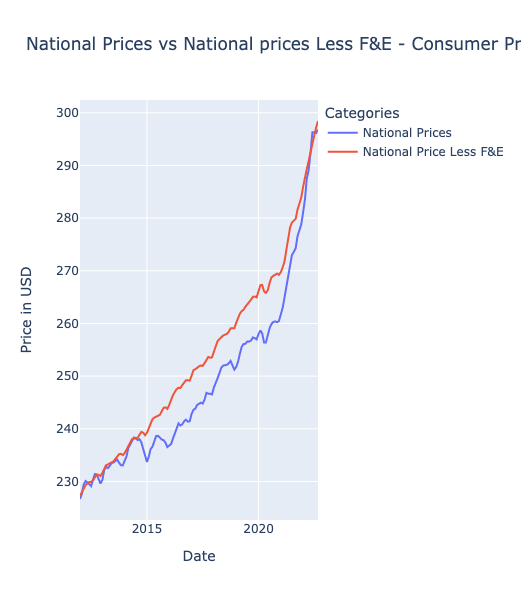

In [125]:
px.line(national_df, 
        labels={'value': 'Price in USD', 'variable': 'Categories'}, 
        title="National Prices vs National prices Less F&E - Consumer Prices 2012-2022",
       width=1300, height=600)

In [126]:
national_2010s_df = national_df.loc[:'2019-12-01']
national_2020s_df = national_df.loc['2020-01-01':]

display(national_2010s_df.head(), national_2020s_df.head())

,National Prices,National Price Less F&E
Date,,
2012-01-01,226.665,227.237
2012-02-01,227.663,227.865
2012-03-01,229.392,228.735
2012-04-01,230.085,229.303
2012-05-01,229.815,229.602


,National Prices,National Price Less F&E
Date,,
2020-01-01,257.971,266.004
2020-02-01,258.678,267.268
2020-03-01,258.115,267.312
2020-04-01,256.389,266.089
2020-05-01,256.394,265.799


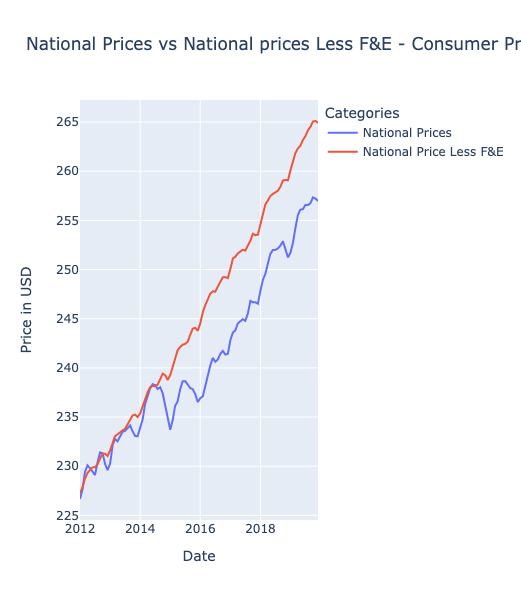

In [127]:
px.line(national_2010s_df, 
        labels={'value': 'Price in USD', 'variable': 'Categories'}, 
        title="National Prices vs National prices Less F&E - Consumer Prices 2012-2019",
       width=1300, height=600)

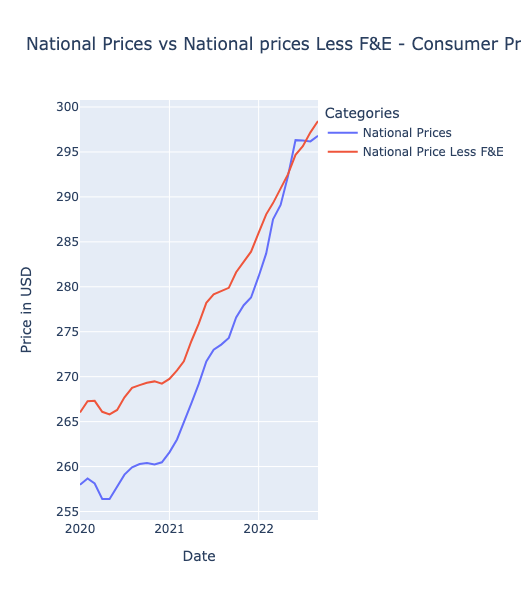

In [128]:
px.line(national_2020s_df, 
        labels={'value': 'Price in USD', 'variable': 'Categories'}, 
        title="National Prices vs National prices Less F&E - Consumer Prices 2020-2022",
       width=1300, height=600)

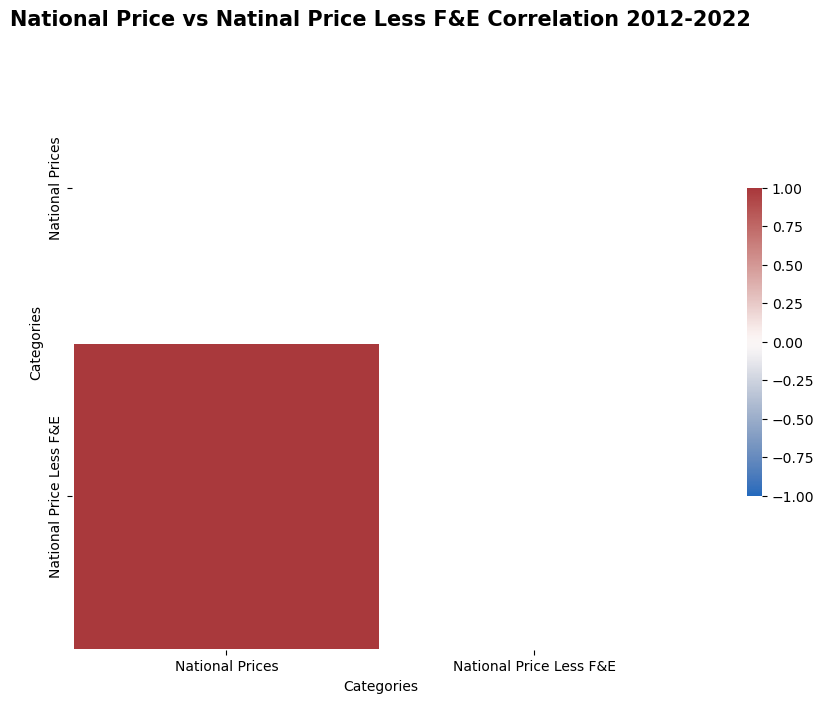

In [129]:
national_correlation_df = national_df.corr()

plt.figure(figsize=(15,8))
plt.title("National Price vs Natinal Price Less F&E Correlation 2012-2022", fontsize=15, fontweight='bold')
sns.heatmap(national_correlation_df,
                cbar_kws={'shrink': .5},
                mask=np.triu(np.ones_like(national_correlation_df, dtype=bool)),
                vmin=-1,
                vmax=1,
                center=0,
                cmap='vlag', 
                linewidth=1,
                square=True).set(xlabel='Categories',
                                 ylabel='Categories');

In [130]:
national_pctchange_df = national_df.pct_change().dropna()

national_pctchange_df

,National Prices,National Price Less F&E
Date,,
2012-02-01,0.004403,0.002764
2012-03-01,0.007595,0.003818
2012-04-01,0.003021,0.002483
2012-05-01,-0.001173,0.001304
2012-06-01,-0.001466,0.001206
...,...,...
2022-05-01,0.011024,0.005707
2022-06-01,0.013736,0.007432
2022-07-01,-0.000118,0.003278


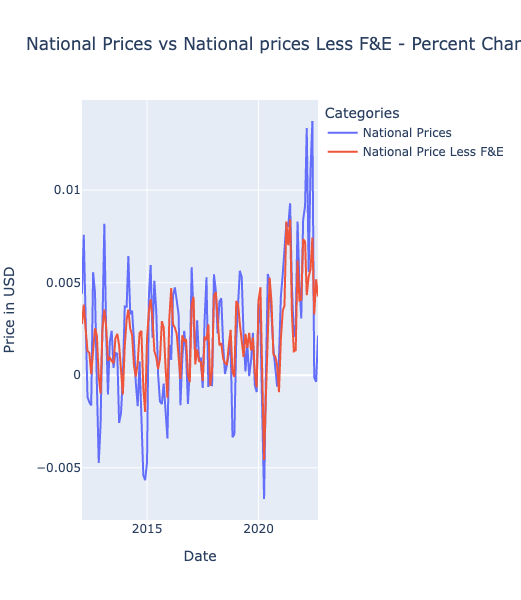

In [131]:
px.line(national_pctchange_df, 
        labels={'value': 'Price in USD', 'variable': 'Categories'}, 
        title="National Prices vs National prices Less F&E - Percent Change 2012-2022",
       width=1300, height=600)

In [132]:
national_2010s_pctchange_df = national_2010s_df.pct_change().dropna()

national_2010s_pctchange_df

,National Prices,National Price Less F&E
Date,,
2012-02-01,0.004403,0.002764
2012-03-01,0.007595,0.003818
2012-04-01,0.003021,0.002483
2012-05-01,-0.001173,0.001304
2012-06-01,-0.001466,0.001206
...,...,...
2019-08-01,-0.000051,0.002288
2019-09-01,0.000783,0.001336
2019-10-01,0.002286,0.002030


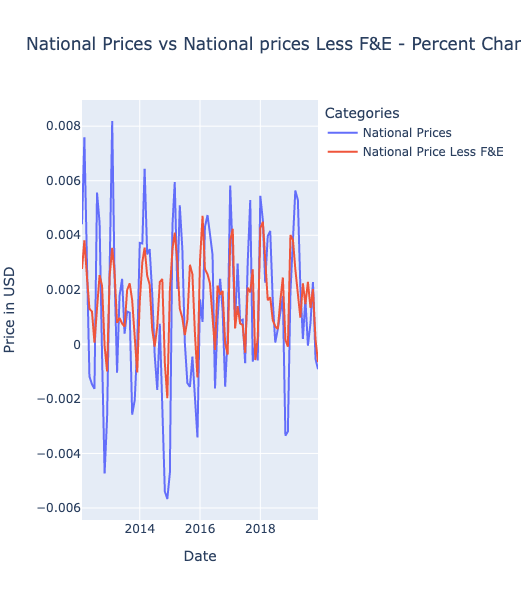

In [133]:
px.line(national_2010s_pctchange_df, 
        labels={'value': 'Price in USD', 'variable': 'Categories'}, 
        title="National Prices vs National prices Less F&E - Percent Change 2012-2019",
       width=1300, height=600)

In [134]:
national_2020s_pctchange_df = national_2020s_df.pct_change().dropna()

national_2020s_pctchange_df.head()

,National Prices,National Price Less F&E
Date,,
2020-02-01,0.002741,0.004752
2020-03-01,-0.002176,0.000165
2020-04-01,-0.006687,-0.004575
2020-05-01,0.000020,-0.001090
2020-06-01,0.005472,0.001892


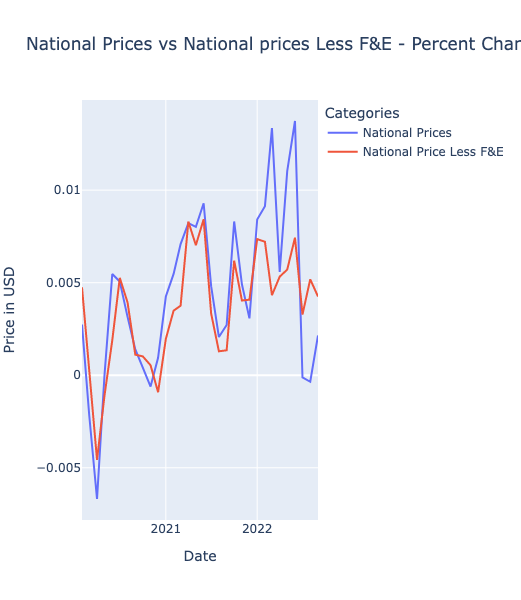

In [135]:
px.line(national_2020s_pctchange_df, 
        labels={'value': 'Price in USD', 'variable': 'Categories'}, 
        title="National Prices vs National prices Less F&E - Percent Change 2020-2022",
       width=1300, height=600)

## Explanation

The analysis shows that the actual and reported inflation have a strong correlation, and have exhibited a similar linear growth trend. 

From 2012 - 2014, the normalized prices of the reported and actual inflation were similar, but the actual inflation normalized price comparatively reduced from 2014 onwards. The decrease in price can be attributed to the food and energy normalized prices increasing at a comparatively lower rate. From 2020 onwards, both the reported and actual inflation experienced a sharp increase, and both measures of inflation reached a similar normalized price level. This indicates that the food and energy prices increased a significantly higher pace, compared to the other basket of goods, during the pandemic. 

The research also revealed that the actual inflation percentage change is notably more volatile compared to the reported inflation percentage change. The is caused by the food and energy normalized prices percentage change being significantly more volatile than the rest of the basket of goods. Our research reveals that the actual inflation, compared to the reported inflation, is far more volatile, and unpredictable price movements have a far greater impact on the public.       

## Part 2: Food and Energy Inflation Analysis & Impact on Overall Inflation

The analysis below we will answer the following questions:
 - What is the price movement for Food and Energy? Do we see an inflationary spike above 2%?
 - What is the correlation in price movements of Food, Energy, and All Sectors (Including and Excluding food and energy)?
 - What we can conclude from analysis?

### Analysis/Visualizations

In [136]:
energy_copy = energy_df.copy().rename(columns={"Price":"Energy"})
food_copy = food_df.copy().rename(columns={"Price":"Food"})
all_copy = all_df.copy().rename(columns={"Price":"National"})
less_food_energy_copy = less_food_energy_df.copy().rename(columns={"Price":"National Less F&E"})

data_df = pd.concat([energy_copy, food_copy, all_copy, less_food_energy_copy], axis=1, join="inner")

data_df

,Energy,Food,National,National Less F&E
Date,,,,
2012-01-01,236.942,232.666,226.665,227.237
2012-02-01,242.663,232.486,227.663,227.865
2012-03-01,253.599,232.792,229.392,228.735
2012-04-01,255.736,233.234,230.085,229.303
2012-05-01,250.306,233.339,229.815,229.602
...,...,...,...,...
2022-05-01,316.761,302.038,292.296,292.506
2022-06-01,340.917,305.041,296.311,294.680
2022-07-01,325.407,308.532,296.276,295.646


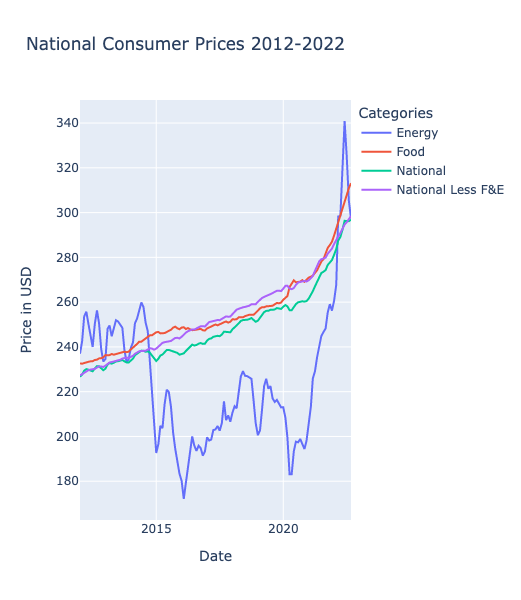

In [137]:
px.line(data_df, 
        labels={'value': 'Price in USD', 'variable': 'Categories'}, 
        title="National Consumer Prices 2012-2022",
       width=1300, height=600)

In [138]:
data_2010s = data_df.loc[:'2019-12-01']
data_2020s = data_df.loc['2020-01-01':]

display(data_2010s.head(), data_2020s.head())

,Energy,Food,National,National Less F&E
Date,,,,
2012-01-01,236.942,232.666,226.665,227.237
2012-02-01,242.663,232.486,227.663,227.865
2012-03-01,253.599,232.792,229.392,228.735
2012-04-01,255.736,233.234,230.085,229.303
2012-05-01,250.306,233.339,229.815,229.602


,Energy,Food,National,National Less F&E
Date,,,,
2020-01-01,213.043,261.057,257.971,266.004
2020-02-01,208.354,261.876,258.678,267.268
2020-03-01,199.573,262.708,258.115,267.312
2020-04-01,183.081,266.757,256.389,266.089
2020-05-01,183.076,268.439,256.394,265.799


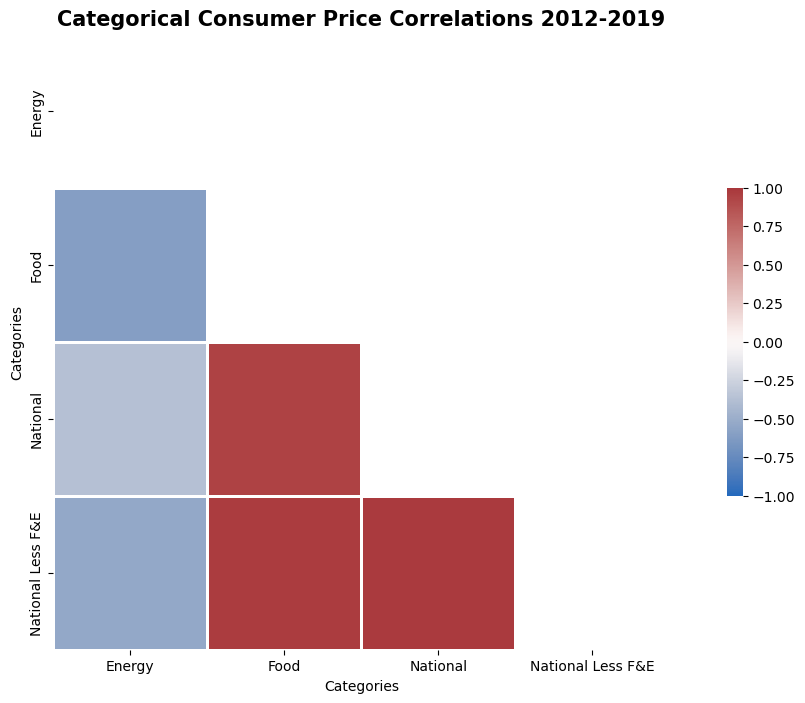

In [139]:
data_2010s_correlation = data_2010s.corr()

plt.figure(figsize=(15,8),)
plt.title("Categorical Consumer Price Correlations 2012-2019", fontsize=15, fontweight='bold')
sns.heatmap(data_2010s_correlation,
                cbar_kws={'shrink': .5},
                mask=np.triu(np.ones_like(data_2010s_correlation, dtype=bool)),
                vmin=-1,
                vmax=1,
                center=0,
                cmap='vlag', 
                linewidth=1,
                square=True).set(xlabel='Categories',
                                 ylabel='Categories');

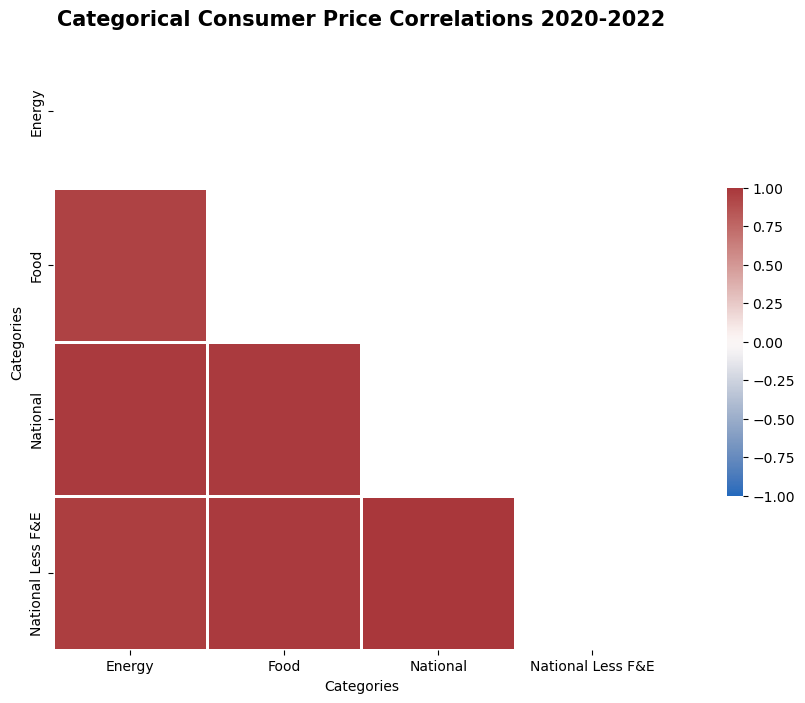

In [140]:
data_2020s_correlation = data_2020s.corr()

plt.figure(figsize=(15,8),)
plt.title("Categorical Consumer Price Correlations 2020-2022", fontsize=15, fontweight='bold')
sns.heatmap(data_2020s_correlation,
                cbar_kws={'shrink': .5},
                mask=np.triu(np.ones_like(data_2020s_correlation, dtype=bool)),
                vmin=-1,
                vmax=1,
                center=0,
                cmap='vlag', 
                linewidth=1,
                square=True).set(xlabel='Categories',
                                 ylabel='Categories');

In [141]:
data_2010s_pctchange = data_2010s.pct_change().dropna()
data_2020s_pctchange = data_2020s.pct_change().dropna()

display(data_2010s_pctchange.head(), data_2020s_pctchange.head())

,Energy,Food,National,National Less F&E
Date,,,,
2012-02-01,0.024145,-0.000774,0.004403,0.002764
2012-03-01,0.045067,0.001316,0.007595,0.003818
2012-04-01,0.008427,0.001899,0.003021,0.002483
2012-05-01,-0.021233,0.000450,-0.001173,0.001304
2012-06-01,-0.024526,0.000960,-0.001466,0.001206


,Energy,Food,National,National Less F&E
Date,,,,
2020-02-01,-0.022010,0.003137,0.002741,0.004752
2020-03-01,-0.042145,0.003177,-0.002176,0.000165
2020-04-01,-0.082636,0.015413,-0.006687,-0.004575
2020-05-01,-0.000027,0.006305,0.000020,-0.001090
2020-06-01,0.056277,0.004958,0.005472,0.001892


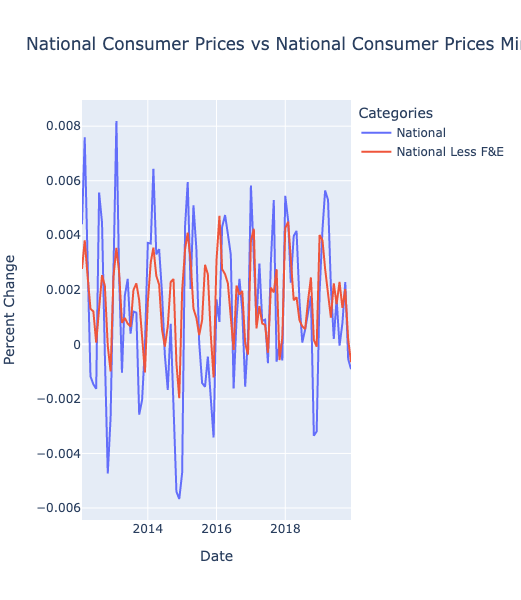

In [142]:
px.line(data_2010s_pctchange[["National", "National Less F&E"]], 
        labels={'value': 'Percent Change', 'variable': 'Categories'}, 
        title="National Consumer Prices vs National Consumer Prices Minus Food & Energy Percent Changes 2012-2019",
       width=1300, height=600)

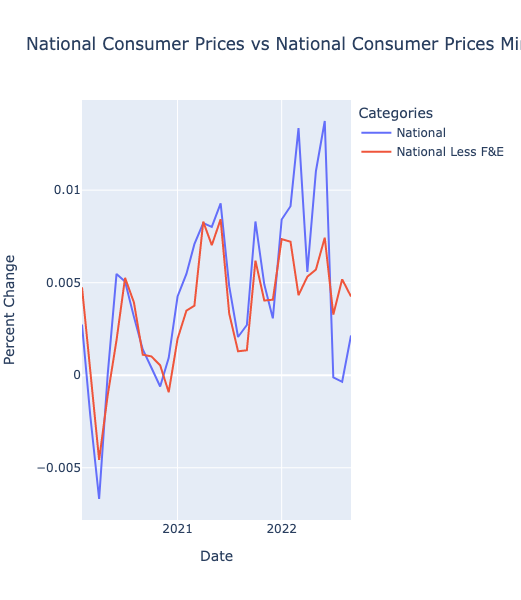

In [143]:
px.line(data_2020s_pctchange[["National", "National Less F&E"]], 
        labels={'value': 'Percent Change', 'variable': 'Categories'}, 
        title="National Consumer Prices vs National Consumer Prices Minus Food & Energy Percent Changes 2020-2022",
       width=1300, height=600)

## Part 3: Differences in inflation between the Midwest, Northeast, South and West region of the United States

The primary reason why food and energy prices are excluded from CPI calcualtions (and thus reported inflation metrics) is their wide variability across a country as large as the United States. It therefore becomes necessary to analyze prices on a regional basis to better understand this difference and contextualize geographically-specific trends. 

1. How have prices varied between each region when food and energy are taken into consideration?
2. How much have prices increased on average in each region both before and after January 2020?

### Analysis/Visualizations

In [144]:
midwest_df = midwest_df.rename(columns = {'Price':'Midwest'})
northeast_df = northeast_df.rename(columns = {'Price':'Northeast'})
south_df = south_df.rename(columns = {'Price':'South'})
west_df = west_df.rename(columns = {'Price':'West'})

In [145]:
all_regions_df = pd.concat([midwest_df, northeast_df, south_df, west_df], axis=1, join='inner')

all_regions_df.head()

,Midwest,Northeast,South,West
Date,,,,
2012-01-01,216.368,242.879,220.497,228.980
2012-02-01,216.855,243.850,221.802,229.995
2012-03-01,218.975,245.125,223.314,232.039
2012-04-01,219.405,245.850,224.275,232.561
2012-05-01,219.145,245.709,223.356,233.053


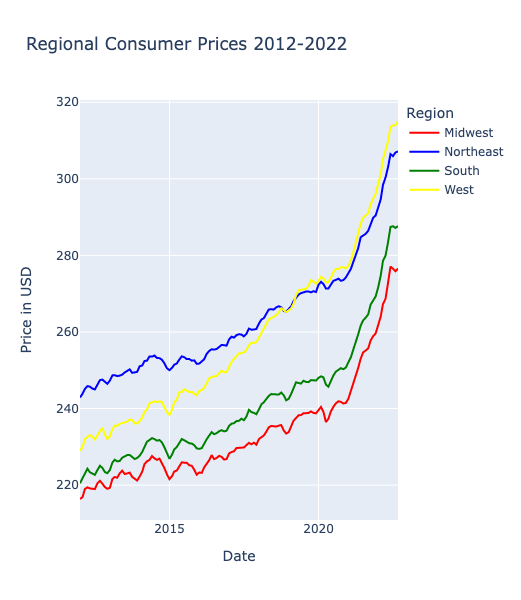

In [146]:
fig = px.line(all_regions_df, 
        labels={'value': 'Price in USD', 'variable': 'Region'}, 
        title="Regional Consumer Prices 2012-2022", color_discrete_sequence=['red','blue','green','yellow'], width=1300, height=600)
fig.show()
fig.write_image("./assets/images/regions_consumer_prices_2012-2022_plot.png")

In [147]:
regions_df = pd.DataFrame({
    'Region':['Midwest','Northeast','South','West'],
    'Latitude':[41.881832,40.730610,33.753746,40.759926],
    'Longitude':[-87.623177,-73.935242,-84.386330,-111.884888],
})

In [148]:
all_regions_mapped_df = pd.concat([regions_df[['Region','Latitude','Longitude']]]*129, ignore_index=True).sort_values('Region').reset_index().drop(columns='index')

dates = pd.DataFrame([int(date[:10].replace('-','')) for date in all_regions_df.index.values.astype(str)])

all_regions_mapped_df['Date'] = pd.concat([dates,dates,dates,dates]).reset_index().drop(columns='index')
all_regions_mapped_df['Price'] = pd.concat([all_regions_df[i] for i in all_regions_df.columns]).reset_index()[0]


all_regions_mapped_df = all_regions_mapped_df[['Date','Price', 'Region', 'Latitude', 'Longitude']]

all_regions_mapped_df

,Date,Price,Region,Latitude,Longitude
0,20120101,216.368,Midwest,41.881832,-87.623177
1,20120201,216.855,Midwest,41.881832,-87.623177
2,20120301,218.975,Midwest,41.881832,-87.623177
3,20120401,219.405,Midwest,41.881832,-87.623177
4,20120501,219.145,Midwest,41.881832,-87.623177
...,...,...,...,...,...
511,20220501,309.645,West,40.759926,-111.884888
512,20220601,313.496,West,40.759926,-111.884888
513,20220701,313.951,West,40.759926,-111.884888
514,20220801,314.013,West,40.759926,-111.884888


In [149]:
all_regions_mapped_df_plot = all_regions_mapped_df.hvplot.points(
    'Longitude',
    'Latitude',
    geo=True,
    size='Price',
    color='Price',
    cmap='nipy_spectral',
    scale=4,
    groupby='Date',
    ylabel='Latitude',
    xlabel='Longitude',
    clabel='Price',
    clim=(220,315),
    frame_width=1000,
    frame_height=500,
    tiles='OSM',
    title='Monthly Regional Consumer Prices January 2012 to September 2022'
).opts(fontsize={'title': 21.5,
                                                                                                      'labels': 16,
                                                                                                      'xticks': 12,
                                                                                                      'yticks': 12,
                                                                                                      'cticks': 10})
hvplot.save(all_regions_mapped_df_plot, './assets/html-plots/monthly_regional_consumer_prices_january_2012_to_September_2022.html')
all_regions_mapped_df_plot

:DynamicMap   [Date]
   :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Points.I :Points   [Longitude,Latitude]   (Price)

In [150]:
all_df = all_df.rename(columns = {'Price':'National'})

In [151]:
combined_df = pd.concat([all_df, midwest_df, northeast_df, south_df, west_df], axis=1, join='inner')
combined_df.head()

,National,Midwest,Northeast,South,West
Date,,,,,
2012-01-01,226.665,216.368,242.879,220.497,228.980
2012-02-01,227.663,216.855,243.850,221.802,229.995
2012-03-01,229.392,218.975,245.125,223.314,232.039
2012-04-01,230.085,219.405,245.850,224.275,232.561
2012-05-01,229.815,219.145,245.709,223.356,233.053


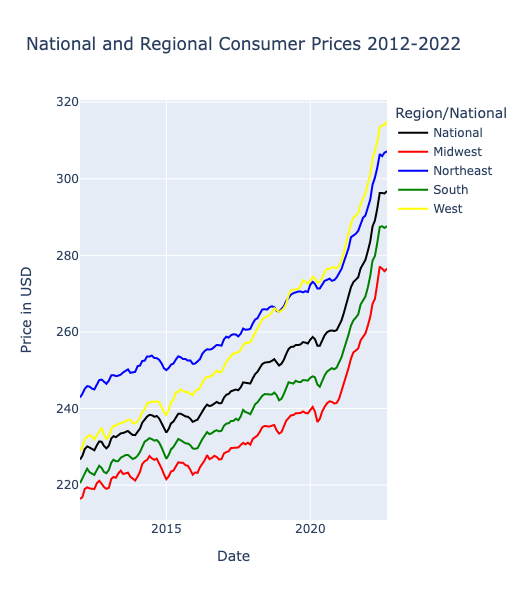

In [152]:
fig = px.line(combined_df, 
        labels={'value': 'Price in USD', 'variable': 'Region/National'}, 
        title="National and Regional Consumer Prices 2012-2022", color_discrete_sequence=['black','red','blue','green','yellow'],
       width=1300, height=600)

fig.show()

fig.write_image('./assets/images/nationa_and_regional_consumer_prices_2012-2022_plot.png')

In [153]:
combined_corr = combined_df.corr()
combined_corr

,National,Midwest,Northeast,South,West
National,1.000000,0.994282,0.999581,0.998443,0.994116
Midwest,0.994282,1.000000,0.993716,0.997840,0.977289
Northeast,0.999581,0.993716,1.000000,0.997695,0.993692
South,0.998443,0.997840,0.997695,1.000000,0.986850
West,0.994116,0.977289,0.993692,0.986850,1.000000


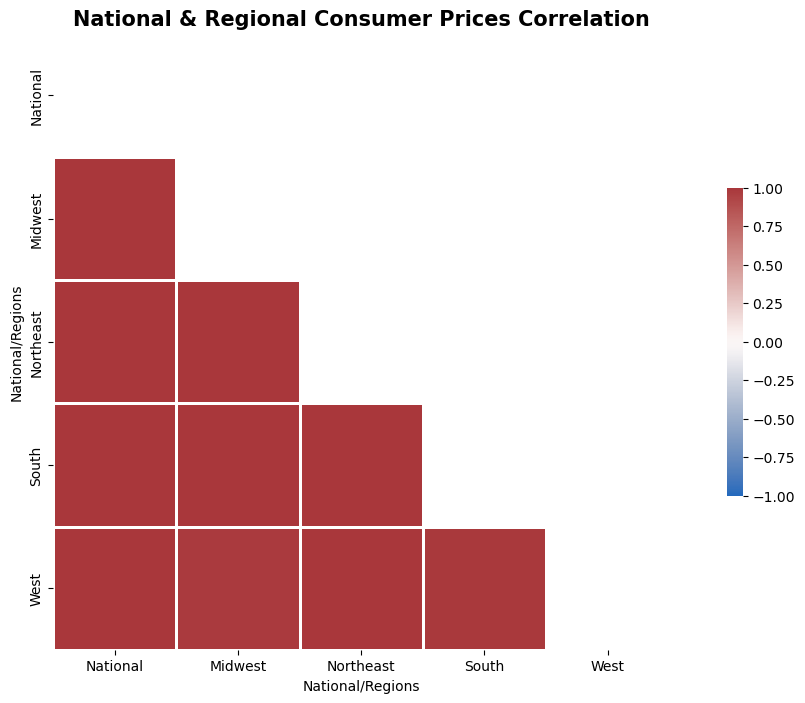

In [155]:
fig = plt.figure(figsize=(15,8),)
plt.title("National & Regional Consumer Prices Correlation", fontsize=15, fontweight='bold')
sns.heatmap(combined_corr,
                cbar_kws={'shrink': .5},
                mask=np.triu(np.ones_like(combined_corr, dtype=bool)),
                vmin=-1,
                vmax=1,
                center=0,
                cmap='vlag', 
                linewidth=1,
                square=True).set(xlabel='National/Regions',
                                 ylabel='National/Regions');
fig.show()
fig.savefig("./assets/images/national_&_regional_consumer_prices_correlation_plot.png")

In [156]:
#find percent change in each reagion per month
all_regions_pct = all_regions_df.pct_change().dropna()
all_regions_pct.tail()

,Midwest,Northeast,South,West
Date,,,,
2022-05-01,0.015016,0.008704,0.012248,0.008139
2022-06-01,0.016133,0.011600,0.014543,0.012437
2022-07-01,-0.001974,-0.001752,0.000630,0.001451
2022-08-01,-0.002351,0.003069,-0.001530,0.000197
2022-09-01,0.002443,0.000968,0.001699,0.003443


In [157]:
# crate seperate dataframes for dates before and after January 2020
all_regions_pct_b20 = all_regions_pct[:95]
all_regions_pct_a20 = all_regions_pct[95:]

display(all_regions_pct_b20.head())
display(all_regions_pct_a20.head())

,Midwest,Northeast,South,West
Date,,,,
2012-02-01,0.002251,0.003998,0.005918,0.004433
2012-03-01,0.009776,0.005229,0.006817,0.008887
2012-04-01,0.001964,0.002958,0.004303,0.002250
2012-05-01,-0.001185,-0.000574,-0.004098,0.002116
2012-06-01,-0.000584,-0.002067,-0.001576,-0.001510


,Midwest,Northeast,South,West
Date,,,,
2020-01-01,0.004004,0.006978,0.002895,0.002773
2020-02-01,0.003050,0.002806,0.001641,0.003922
2020-03-01,-0.005232,-0.002010,-0.001111,-0.001520
2020-04-01,-0.011243,-0.004425,-0.007585,-0.003949
2020-05-01,0.003455,0.000074,-0.002266,0.000546


In [158]:
all_regions_pct_b20_avg = all_regions_pct_b20.mean()
all_regions_pct_a20_avg = all_regions_pct_a20.mean()

display(all_regions_pct_b20_avg)
display(all_regions_pct_a20_avg)

Midwest      0.001043
Northeast    0.001135
South        0.001213
West         0.001842
dtype: float64

Midwest      0.004481
Northeast    0.003874
South        0.004604
West         0.004409
dtype: float64

In [159]:
all_regions_pct_before_2020 = regions_df.copy()
all_regions_pct_before_2020['Average Percentage Change'] = all_regions_pct_b20_avg.values
all_regions_pct_before_2020

,Region,Latitude,Longitude,Average Percentage Change
0,Midwest,41.881832,-87.623177,0.001043
1,Northeast,40.730610,-73.935242,0.001135
2,South,33.753746,-84.386330,0.001213
3,West,40.759926,-111.884888,0.001842


In [160]:
all_regions_pct_before_2020_plot = all_regions_pct_before_2020.hvplot.points(
    'Longitude',
    'Latitude',
    geo=True,
    size='Average Percentage Change',
    color='Average Percentage Change',
    scale=1300,
    ylabel='Latitude',
    xlabel='Longitude',
    cmap='nipy_spectral',
    clabel='Average Percent Change',
    frame_width=1200,
    frame_height=500,
    tiles='OSM',
    title='Average Regional Consumer Price Percentage Change 2012-2019').opts(fontsize={'title': 21.5,
                                                                                                      'labels': 16,
                                                                                                      'xticks': 12,
                                                                                                      'yticks': 12,
                                                                                                      'cticks': 10})
hvplot.save(all_regions_pct_before_2020_plot,'./assets/html-plots/average_regional_consumer_price_percentage_change_2012-2019_plot.html')
all_regions_pct_before_2020

,Region,Latitude,Longitude,Average Percentage Change
0,Midwest,41.881832,-87.623177,0.001043
1,Northeast,40.730610,-73.935242,0.001135
2,South,33.753746,-84.386330,0.001213
3,West,40.759926,-111.884888,0.001842


In [161]:
all_regions_pct_after_2020 = regions_df.copy()
all_regions_pct_after_2020['Average Percentage Change'] = all_regions_pct_a20_avg.values
all_regions_pct_after_2020

,Region,Latitude,Longitude,Average Percentage Change
0,Midwest,41.881832,-87.623177,0.004481
1,Northeast,40.730610,-73.935242,0.003874
2,South,33.753746,-84.386330,0.004604
3,West,40.759926,-111.884888,0.004409


In [163]:
all_regions_pct_after_2020_plot = all_regions_pct_after_2020.hvplot.points(
    'Longitude',
    'Latitude',
    geo=True,
    size='Average Percentage Change',
    color='Average Percentage Change',
    scale=1300,
    ylabel='Latitude',
    xlabel='Longitude',
    cmap='nipy_spectral',
    clabel='Average Percent Change',
    frame_width=1000,
    frame_height=500,
    tiles='OSM',
    title='Average Regional Consumer Price Percentage Change 2020-2022').opts(fontsize={'title': 21.5,
                                                                                                      'labels': 16,
                                                                                                      'xticks': 12,
                                                                                                      'yticks': 12,
                                                                                                      'cticks': 10})
hvplot.save(all_regions_pct_after_2020_plot, './assets/html-plots/average_regional_consumer_price_percentage_change_2020-2022_plot.html')
all_regions_pct_after_2020_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Average Percentage Change)

## Explanation
Prior to January of 2020 prices increaseed by  between .1% and .18% on average per month with the Midwest being the lowest and the west being the highest. After this date They, have increased by between .38% and .46% on average per month with the Northeast being the lowest and the south being the Highest. 

## Conlcusion
@TODO Insert Conclusion

## Additional Research Topics
- The impact of inflation can be further researched by investigating:
- The price changes of shelter over time
- The price changes of medical care over time
- The inflation trends, over time, during Democrat or Republican presidencies
- The impact of inflation on the financial security of the average person